# Problem Statement:

Forecast the CocaCola prices data set. Prepare a document for each model explaining how many dummy variables you have created and RMSE value for each model. Finally which model you will use for Forecasting.

In [1]:
# importing basic libraries
import numpy as np
import pandas as pd
import seaborn as sns
from numpy import log
from numpy import sqrt
from pandas import read_csv
from pandas import DataFrame
import statsmodels.api as smfa
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
# loading data
df = pd.read_excel('CocaCola_Sales_Rawdata.xlsx')

# Data Exploration

In [3]:
df.shape

(42, 2)

In [4]:
df.head(10)

Quarter        Sales
0   Q1_86  1734.827000
1   Q2_86  2244.960999
2   Q3_86  2533.804993
3   Q4_86  2154.962997
4   Q1_87  1547.818996
5   Q2_87  2104.411995
6   Q3_87  2014.362999
7   Q4_87  1991.746998
8   Q1_88  1869.049999
9   Q2_88  2313.631996

In [5]:
df.tail()

Quarter   Sales
37   Q2_95  4936.0
38   Q3_95  4895.0
39   Q4_95  4333.0
40   Q1_96  4194.0
41   Q2_96  5253.0

In [6]:
df.sample(5)

Quarter        Sales
21   Q2_91  3039.522995
29   Q2_93  3899.000000
5    Q2_87  2104.411995
7    Q4_87  1991.746998
2    Q3_86  2533.804993

## Quick Data Check

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 804.0+ bytes


## Statistical summary

In [8]:
df.describe()

Sales
count    42.000000
mean   2994.353308
std     977.930896
min    1547.818996
25%    2159.714247
50%    2782.376999
75%    3609.250000
max    5253.000000

# Data Preprocessing

## Identifying Duplicates

In [9]:
df.duplicated().sum()

0

- There is no duplicate values present in dataset.

## Identifying Missing Values

In [10]:
df.isnull().sum()

Quarter    0
Sales      0
dtype: int64

- There is no missing values in dataset.

## Data Type Conversion

In [11]:
df = pd.read_excel("CocaCola_Sales_Rawdata.xlsx", header=0, parse_dates=True)

In [12]:
df.head()

Quarter        Sales
0   Q1_86  1734.827000
1   Q2_86  2244.960999
2   Q3_86  2533.804993
3   Q4_86  2154.962997
4   Q1_87  1547.818996

In [13]:
# Define a function to extract year and quarter, and create the desired date
def extract_datetime(quarter):
   year = int(quarter.split('_')[1])
   quarter = int(quarter.split('_')[0].replace('Q', ''))

   # Map quarters to desired months
   month_map = {1: 1, 2: 4, 3: 7, 4: 10}
   month = month_map[quarter]

   return pd.to_datetime(f"{year}-{month}-01")

In [14]:
# Apply the function to create a new 'Date' column
df['Date'] = df['Quarter'].apply(extract_datetime)

# Drop the original 'Quarter' column if not needed
df = df.drop('Quarter', axis=1)

df.set_index('Date',inplace=True)

df.head()

Sales
Date                   
1986-01-01  1734.827000
1986-04-01  2244.960999
1986-07-01  2533.804993
1986-10-01  2154.962997
1987-01-01  1547.818996

# Data Visualization

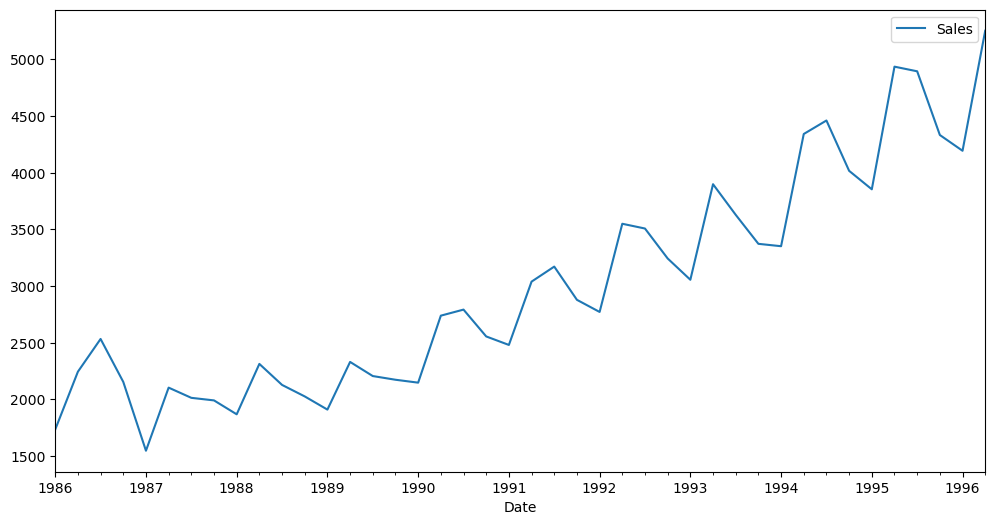

In [15]:
df.plot(figsize=(12,6));

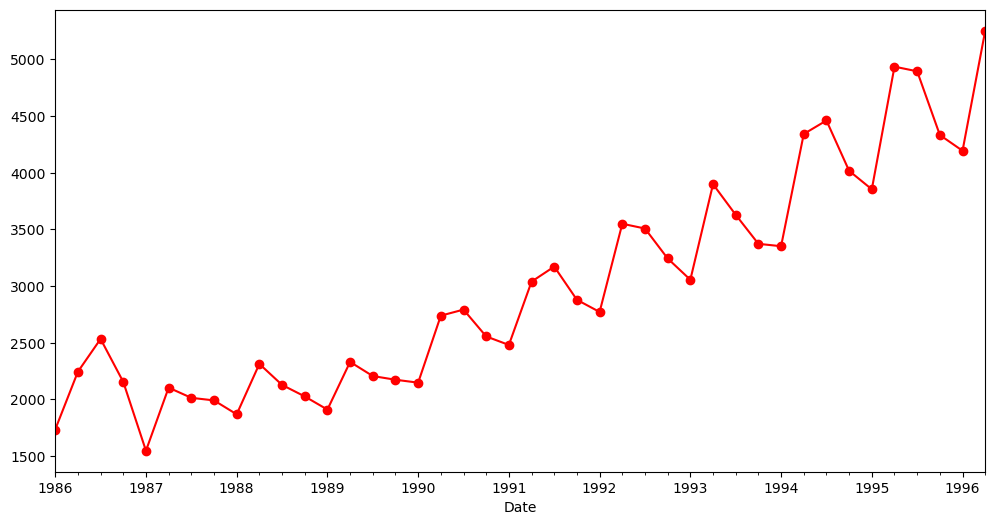

In [16]:
df['Sales'].plot(figsize=(12, 6),color='red',marker='o');

- Sales appear to be increasing over the ten years. There is a general upward trend in the line.
- There is a clear upward trajectory in the line plot, suggesting a positive trend.

## Histogram and Density Plots

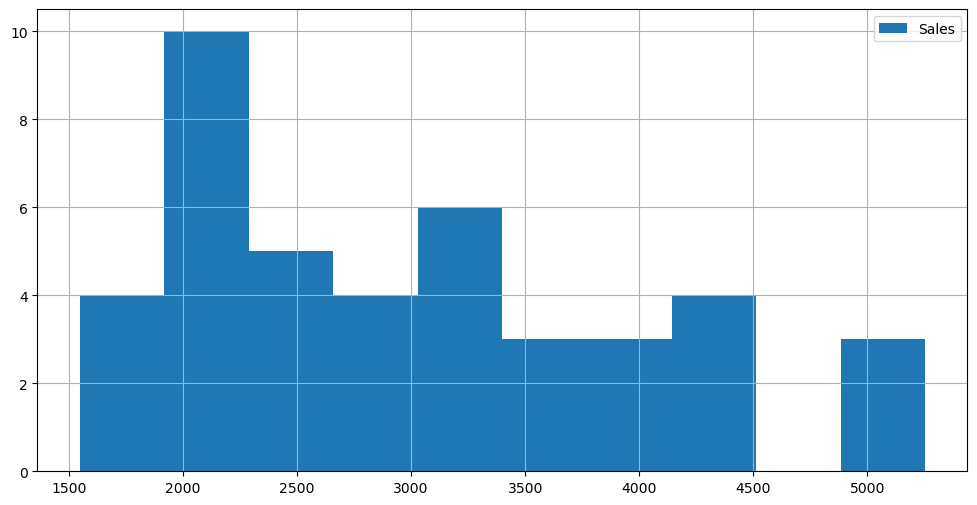

In [17]:
df.Sales.hist(figsize=(12,6),legend=True);

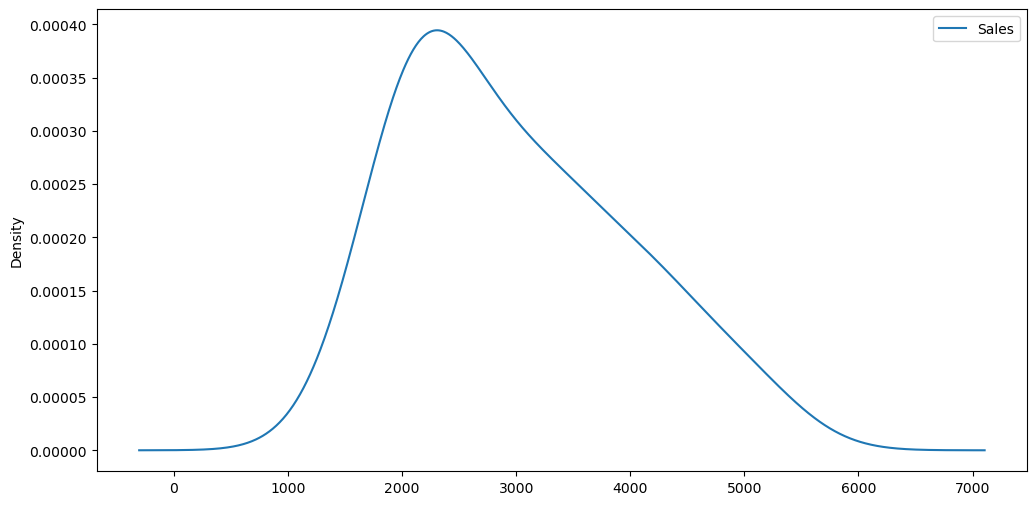

In [18]:
df.Sales.plot(kind='kde',figsize=(12,6),legend=True);

- The distribution of the number of passengers is skewed to the right.

## Lag plot

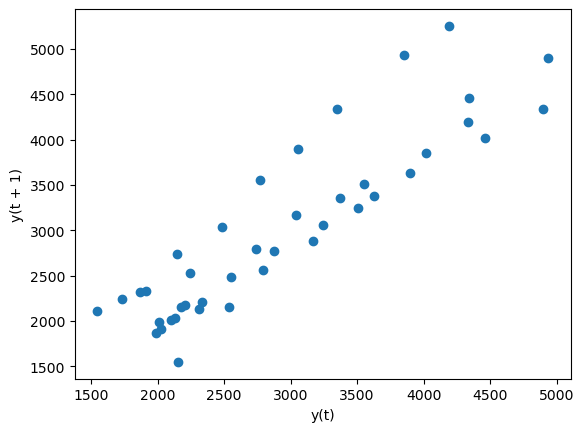

In [19]:
from pandas.plotting import lag_plot

lag_plot(df);

- The above lagplot suggests autocorrelation is present. A positive linear trend (i.e. going upwards from left to right) is suggestive of positive autocorrelation

## ETS - Decomposition

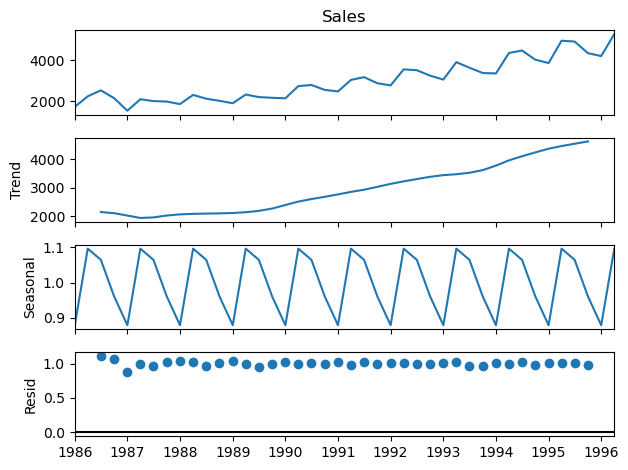

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['Sales'], model='multiplicative')  # model='mul' also works
result.plot();

- Based on this chart, it looks like the trend in the - earlier days is increasing at a higher rate than just linear 

## Simple Moving Average

In [21]:
df['6-month-SMA'] = df['Sales'].rolling(window=6).mean()
df['12-month-SMA'] = df['Sales'].rolling(window=12).mean()

In [22]:
df.head(15)

Sales  6-month-SMA  12-month-SMA
Date                                              
1986-01-01  1734.827000          NaN           NaN
1986-04-01  2244.960999          NaN           NaN
1986-07-01  2533.804993          NaN           NaN
1986-10-01  2154.962997          NaN           NaN
1987-01-01  1547.818996          NaN           NaN
1987-04-01  2104.411995  2053.464497           NaN
1987-07-01  2014.362999  2100.053830           NaN
1987-10-01  1991.746998  2057.851496           NaN
1988-01-01  1869.049999  1947.058997           NaN
1988-04-01  2313.631996  1973.503831           NaN
1988-07-01  2128.320000  2070.253998           NaN
1988-10-01  2026.828999  2057.323498   2055.393998
1989-01-01  1910.603996  2040.030331   2070.042081
1989-04-01  2331.164993  2096.599997   2077.225747
1989-07-01  2206.549995  2152.849997   2049.954497

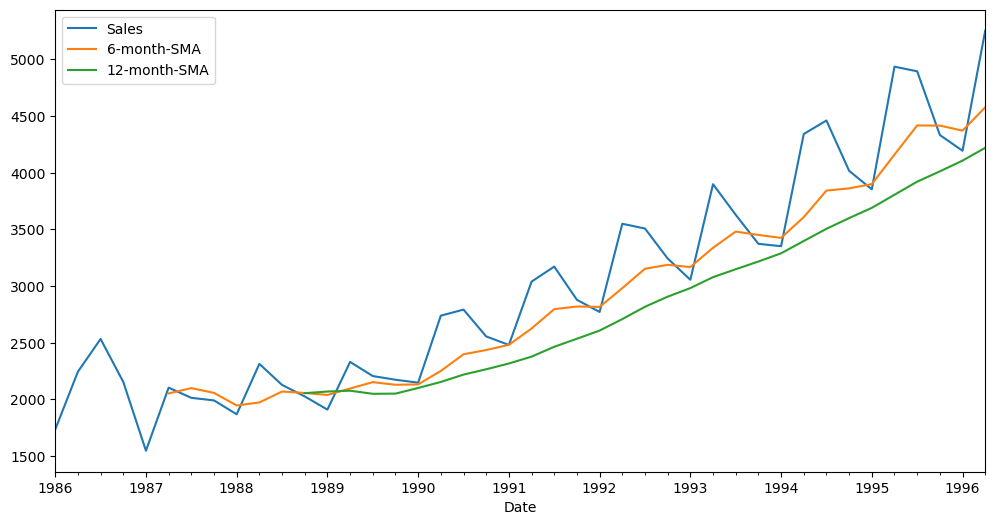

In [23]:
df.plot(figsize=(12,6), legend=True);

* Overall, sales appear to be increasing over the ten years.
* This is because the blue line, which represents the actual sales data, has an upward slope.
* 
The 6-month SMA is more responsive to changes in the sales data than the 12-month SMA
*  This is because the 6-month SMA is based on a shorter period of data and therefore it is able to capture more recent changes in the trend
*  For example, you can see that the 6-month SMA (orange line) starts to increase in 1988, while the 12-month SMA (green line) does not start to increase until 1989
* 
The 12-month SMA is smoother than the 6-month SM
* This is because the 12-month SMA is based on a longer period of data and therefore it is less likely to be affected by random fluctuations in the sales dat
* For example, you can see that the 12-month SMA (green line) is less volatile than the 6-month SMA (orange line).

## Exponentially Weighted Moving Average

In [24]:
df['EWMA12'] = df['Sales'].ewm(span=12,adjust=False).mean()

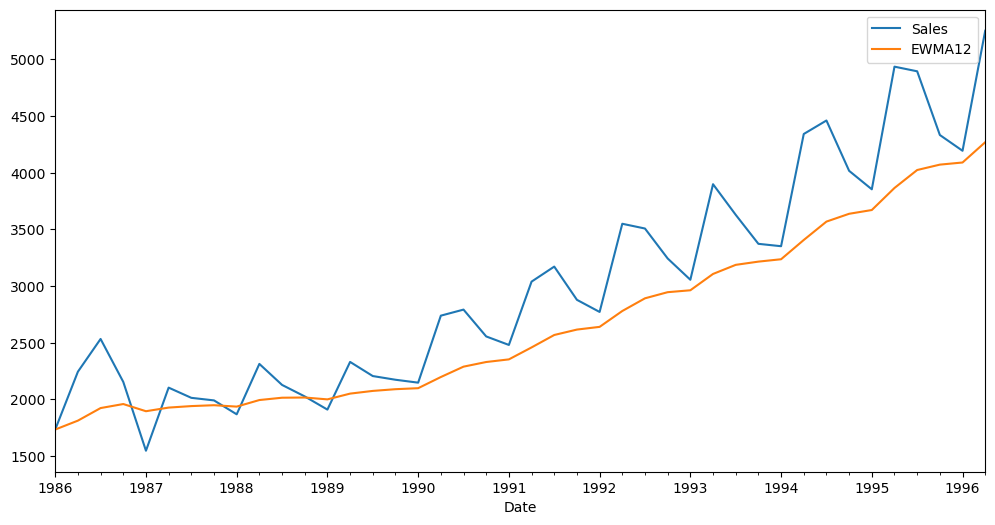

In [25]:
df[['Sales','EWMA12']].plot(figsize=(12,6), legend=True);

## Comparing SMA to EWMA

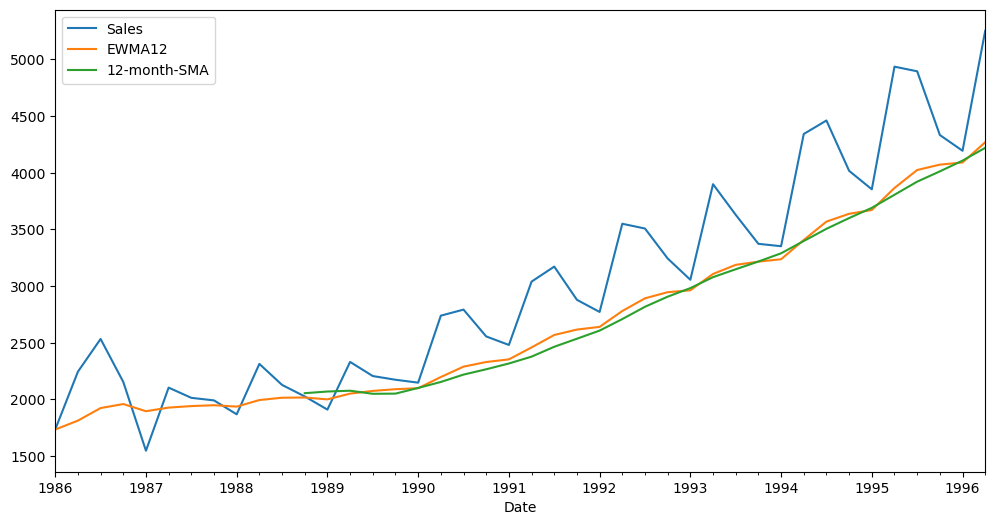

In [26]:
df[['Sales','EWMA12','12-month-SMA']].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

* The 12-month Simple Moving Average (SMA) (green line) is smoother than the 12-month Exponentially Weighted Moving Average (EWMA) (orange line).
* This is because the SMA gives equal weight to all of the data points in the past 12 months, while the EWMA gives more weight to the most recent data points.
* As a result, the SMA is less sensitive to short-term fluctuations in the data.
* 
The orange line (EWMA) appears to track the blue line (actual sales data) more closely than the green line (SMA) in recent years
*  This is because the EWMA gives more weight to recent data points
*  For example, in 1995, there is a sharp increase in sales, and the EWMA (orange line) follows this increase more closely than the SMA (green line).

- The above example employed Simple Exponential Smoothing with one smoothing factor Î±. Unfortunately, this technique does a poor job of forecasting when there is a trend in the data as seen above.
- In the next section we'll look at Double and Triple Exponential Smoothing with the Holt-Winters Methods.

## Double Exponential Smoothing

In Double Exponential Smoothing (aka Holt's Method) we introduce a new smoothing factor 
 (beta) that addresses trend:

In [27]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

df['DESadd12'] = ExponentialSmoothing(df['Sales'], trend='add').fit().fittedvalues.shift(-1)
df.head()

C:\Users\vijay\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


Sales  6-month-SMA  12-month-SMA       EWMA12     DESadd12
Date                                                                        
1986-01-01  1734.827000          NaN           NaN  1734.827000  1975.607008
1986-04-01  2244.960999          NaN           NaN  1813.309153  2025.038484
1986-07-01  2533.804993          NaN           NaN  1924.154667  2139.707286
1986-10-01  2154.962997          NaN           NaN  1959.663641  2159.571884
1987-01-01  1547.818996          NaN           NaN  1896.302926  2035.454645

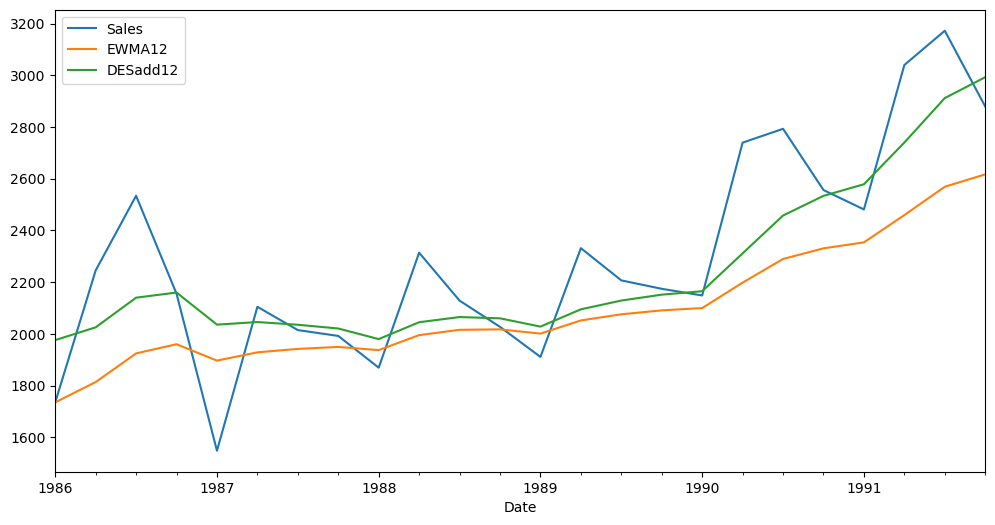

In [28]:
df[['Sales','EWMA12','DESadd12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

- Here we can see that Double Exponential Smoothing is a much better representation of the time series data.
* The DES (green line) appears to track the blue line (actual sales data) more closely than the EWMA (orange line) in recent years.
* This is because the DES takes into account not only the level of past data points but also the rate of change of those data points.
* This can help the DES to more accurately capture trends in the data, especially when those trends are changing rapidly.

- Let's see if using a multiplicative seasonal adjustment helps.

In [29]:
df['DESmul12'] = ExponentialSmoothing(df['Sales'], trend='mul').fit().fittedvalues.shift(-1)
df.head()

C:\Users\vijay\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


Sales  6-month-SMA  12-month-SMA       EWMA12     DESadd12  \
Date                                                                           
1986-01-01  1734.827000          NaN           NaN  1734.827000  1975.607008   
1986-04-01  2244.960999          NaN           NaN  1813.309153  2025.038484   
1986-07-01  2533.804993          NaN           NaN  1924.154667  2139.707286   
1986-10-01  2154.962997          NaN           NaN  1959.663641  2159.571884   
1987-01-01  1547.818996          NaN           NaN  1896.302926  2035.454645   

               DESmul12  
Date                     
1986-01-01  1978.236027  
1986-04-01  2028.354802  
1986-07-01  2144.450169  
1986-10-01  2165.311677  
1987-01-01  2041.674117

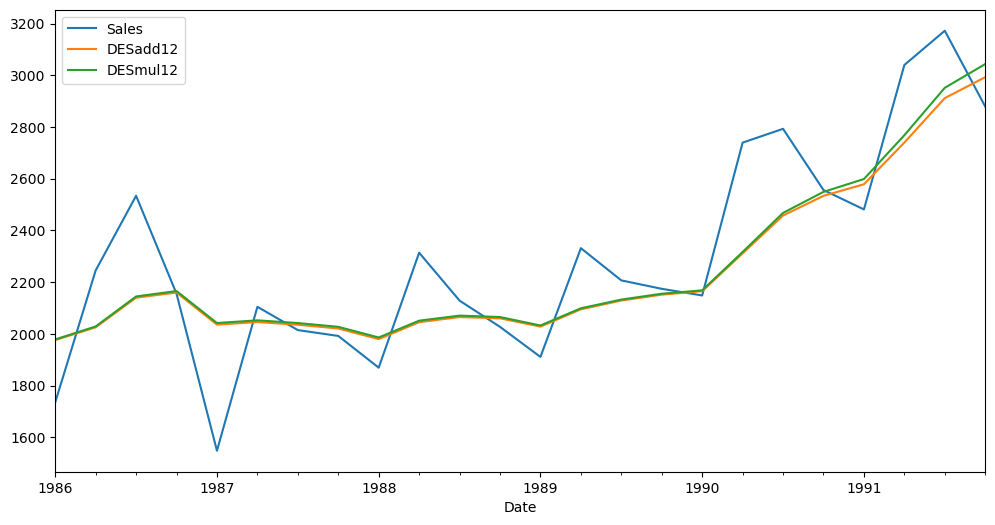

In [30]:
df[['Sales','DESadd12','DESmul12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

- Although minor, it does appear that a multiplicative adjustment gives better results. 
- Note that the green line almost completely overlaps the original data.

## Triple Exponential Smoothing

With Triple Exponential Smoothing (aka the Holt-Winters Method) we introduce a smoothing factor 
 (gamma) that addresses seasonality:

In [31]:
df['TESadd12'] = ExponentialSmoothing(df['Sales'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues
df.head()

C:\Users\vijay\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


Sales  6-month-SMA  12-month-SMA       EWMA12     DESadd12  \
Date                                                                           
1986-01-01  1734.827000          NaN           NaN  1734.827000  1975.607008   
1986-04-01  2244.960999          NaN           NaN  1813.309153  2025.038484   
1986-07-01  2533.804993          NaN           NaN  1924.154667  2139.707286   
1986-10-01  2154.962997          NaN           NaN  1959.663641  2159.571884   
1987-01-01  1547.818996          NaN           NaN  1896.302926  2035.454645   

               DESmul12     TESadd12  
Date                                  
1986-01-01  1978.236027  1655.294432  
1986-04-01  2028.354802  2344.034919  
1986-07-01  2144.450169  2265.575526  
1986-10-01  2165.311677  2064.166227  
1987-01-01  2041.674117  1848.877105

In [32]:
df['TESmul12'] = ExponentialSmoothing(df['Sales'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues
df.head()

C:\Users\vijay\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\vijay\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


Sales  6-month-SMA  12-month-SMA       EWMA12     DESadd12  \
Date                                                                           
1986-01-01  1734.827000          NaN           NaN  1734.827000  1975.607008   
1986-04-01  2244.960999          NaN           NaN  1813.309153  2025.038484   
1986-07-01  2533.804993          NaN           NaN  1924.154667  2139.707286   
1986-10-01  2154.962997          NaN           NaN  1959.663641  2159.571884   
1987-01-01  1547.818996          NaN           NaN  1896.302926  2035.454645   

               DESmul12     TESadd12     TESmul12  
Date                                               
1986-01-01  1978.236027  1655.294432  1912.073408  
1986-04-01  2028.354802  2344.034919  2228.686438  
1986-07-01  2144.450169  2265.575526  2242.980440  
1986-10-01  2165.311677  2064.166227  2270.317829  
1987-01-01  2041.674117  1848.877105  2038.801197

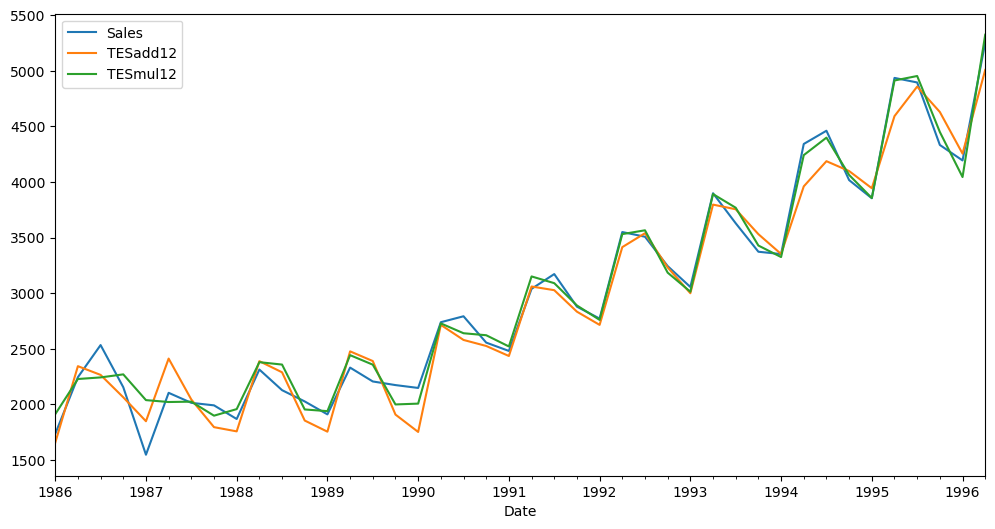

In [33]:
df[['Sales','TESadd12','TESmul12']].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

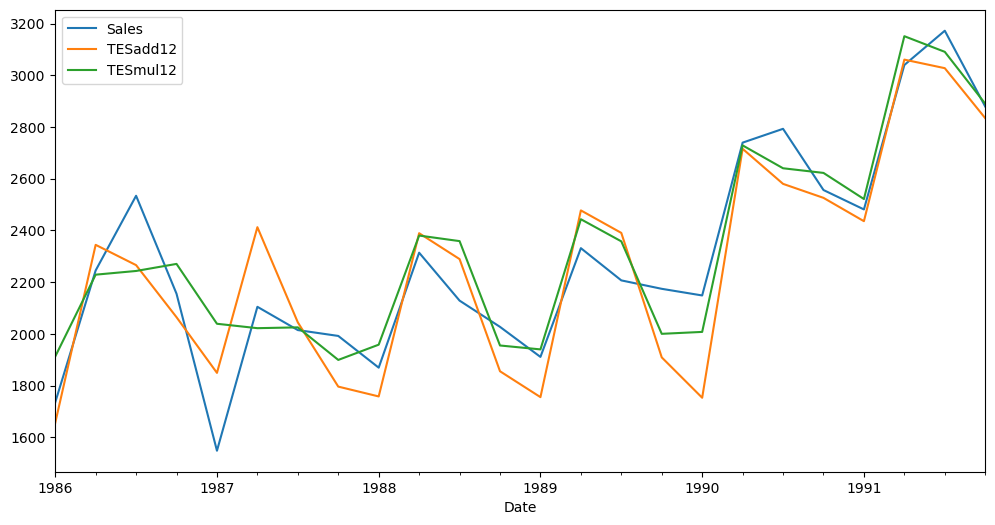

In [34]:
df[['Sales','TESadd12','TESmul12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

- There is a seasonal pattern to the sales data, with sales appearing to be higher in the latter half of each year. 
- This seasonality is not captured by the triple exponential smoothing model, as both the orange and green lines smooth out the seasonal fluctuations.

# ACF PLot

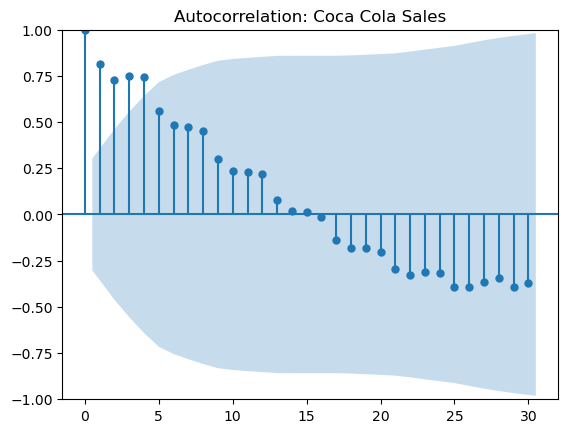

In [35]:
plot_acf(df['Sales'],title = 'Autocorrelation: Coca Cola Sales', lags=30);

- the ACF plot suggests that Coca-Cola sales exhibit trend stationarity.
- This means that the mean, variance, and autocorrelation of the time series are constant over time.
- This plot indicates non-stationary data, as there are a large number of lags before ACF values drop off.

## PACF Plots

- Partial autocorrelations work best with stationary data.
- To make the Airline Passengers data stationary, we'll first apply differencing

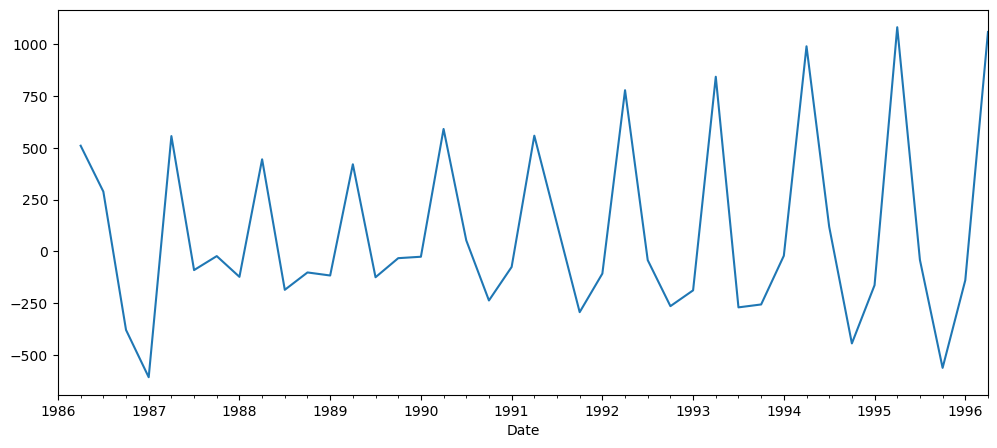

In [36]:
from statsmodels.tsa.statespace.tools import diff

df['d1'] = diff(df['Sales'],k_diff=1)
df['d1'].plot(figsize=(12,5));

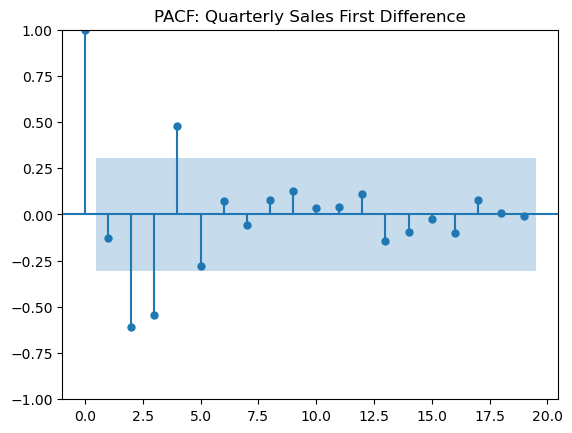

In [37]:
lags=20
plot_pacf(df['d1'].dropna(),title='PACF: Quarterly Sales First Difference', lags=np.arange(lags));

The first lag of the PACF plot is statistically significant, 
which indicates that there is a strong positive correlation between Coca-Cola sales at a given time and Coca-Cola sales one lag period earlier.
This means that Coca-Cola sales tend to be similar from one period to the next.
The remaining lags of the PACF plot are not statistically significant
 which suggests that there is no significant autocorrelation at lags greater than 1.
 This means that Coca-Cola sales are not significantly dependent on sales from more than one period in the past, after removing the effects of dependence at shorter lags.

# Tests for Stationarity

## Augmented Dickey-Fuller Test

In [38]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [39]:
adf_test(df['Sales'])

Augmented Dickey-Fuller Test: 
ADF test statistic       1.309421
p-value                  0.996661
# lags used              7.000000
# observations          34.000000
critical value (1%)     -3.639224
critical value (5%)     -2.951230
critical value (10%)    -2.614447
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [40]:
from statsmodels.graphics.tsaplots import quarter_plot

In [41]:
dfq = df['Sales'].resample(rule='Q').mean()

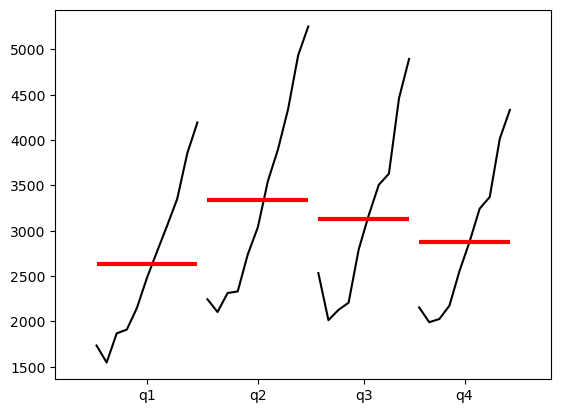

In [42]:
quarter_plot(dfq);

# Automatic ARIMA model fitting

In [43]:
from pmdarima import auto_arima

In [44]:
stepwise_fit = auto_arima(df['Sales'], start_p=1, start_q=1,
                          max_p=3, max_q=3, m=12,
                          start_P=0, seasonal=True,
                          d=None, D=1, trace=True,
                          error_action='ignore',   # we don't want to know if an order does not work
                          suppress_warnings=True,  # we don't want convergence warnings
                          stepwise=True)           # set to stepwise

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=407.084, Time=0.39 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=402.446, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=406.443, Time=0.20 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=406.440, Time=0.23 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=404.444, Time=0.16 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=404.444, Time=0.28 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.37 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=404.445, Time=0.07 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=404.443, Time=0.07 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=405.084, Time=0.17 sec
 ARIMA(0,1,0)(0,1,0)[12] intercept   : AIC=403.610, Time=0.05 sec

Best model:  ARIMA(0,1,0)(0,1,0)[12]          
Total fit time: 2.025 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   42
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood                -200.223
Date:                            Tue, 27 Feb 2024   AIC                            402.446
Time:                                    00:26:55   BIC                            403.813
Sample:                                01-01-1986   HQIC                           402.874
                                     - 04-01-1996                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      5.813e+04   1.67e+04      3.472      0.001    2.53e+04    9.09e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 0.54
Prob(Q):                              0.88   Prob(JB):                         0.76
Heteroskedasticity (H):               0.54   Skew:                             0.22
Prob(H) (two-sided):                  0.35   Kurtosis:                         2.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Data Splitting

In [45]:
df1 = df[['Sales']]

In [46]:
len(df1)

42

In [47]:
# Set one year for testing
train = df1.iloc[:30]
test = df1.iloc[30:]

In [48]:
print("Shape of train: ",train.shape)
print("Shape of test: ", test.shape)

Shape of train:  (30, 1)
Shape of test:  (12, 1)


# Model Selection

In [49]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [50]:
model = SARIMAX(train['Sales'],order=(0, 1, 0),seasonal_order=(0, 1, 0, 12))
results = model.fit()
results.summary()

C:\Users\vijay\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\vijay\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                   30
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood                -118.553
Date:                            Tue, 27 Feb 2024   AIC                            239.106
Time:                                    00:26:55   BIC                            239.940
Sample:                                01-01-1986   HQIC                           239.189
                                     - 04-01-1993                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      6.663e+04   2.56e+04      2.603      0.009    1.65e+04    1.17e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 0.32
Prob(Q):                              0.94   Prob(JB):                         0.85
Heteroskedasticity (H):               0.42   Skew:                             0.15
Prob(H) (two-sided):                  0.32   Kurtosis:                         2.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [51]:
# Obtain predicted values
start=len(train)
end=len(train)+len(test)-1

predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMA(0,1,0)(0,1,0,12) Predictions')

C:\Users\vijay\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [52]:
# Compare predictions to expected values
for i in range(len(predictions)):
    print(f"predicted={predictions[i]:<11.10}, expected={test['Sales'][i]}")

predicted=3952.445999, expected=3629.0
predicted=3715.701996, expected=3373.0
predicted=3640.666   , expected=3352.0
predicted=4199.214996, expected=4342.0
predicted=4331.807999, expected=4461.0
predicted=4038.693001, expected=4017.0
predicted=3931.692001, expected=3854.0
predicted=4709.692001, expected=4936.0
predicted=4667.692001, expected=4895.0
predicted=4403.551994, expected=4333.0
predicted=4215.692001, expected=4194.0
predicted=5058.692001, expected=5253.0


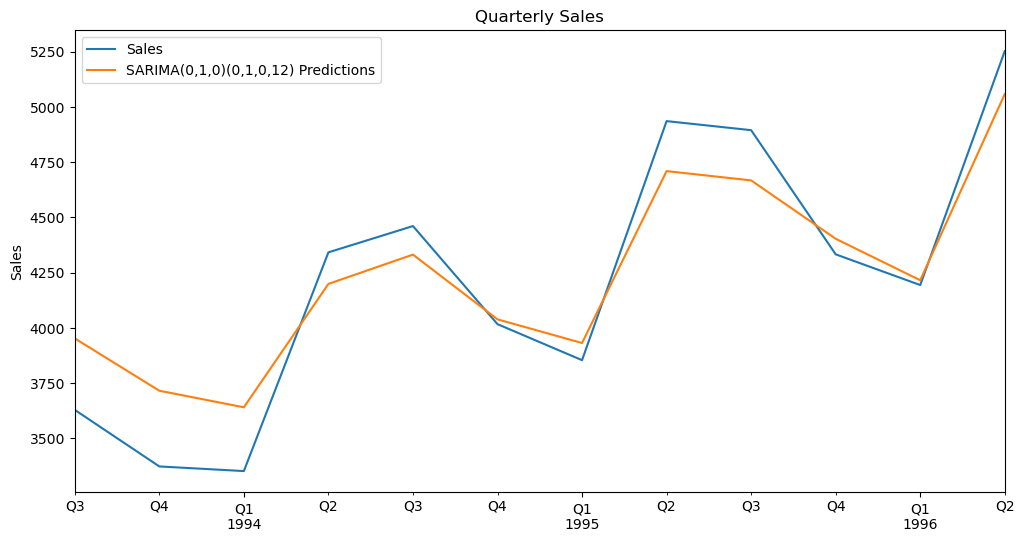

In [53]:
# Plot predictions against known values
title = 'Quarterly Sales'
ylabel='Sales'
xlabel=''

ax = test['Sales'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

# Model Evaluation

In [54]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(test['Sales'], predictions)
print(f'SARIMA(0,1,0)(0,1,0,12) MSE Error: {error:11.10}')

SARIMA(0,1,0)(0,1,0,12) MSE Error:  41255.2298


In [55]:
from statsmodels.tools.eval_measures import rmse

error = rmse(test['Sales'], predictions)
print(f'SARIMA(0,1,0)(0,1,0,12) RMSE Error: {error:11.10}')

SARIMA(0,1,0)(0,1,0,12) RMSE Error: 203.1138346


## Retrain the model on the full data, and forecast the future

In [56]:
model = SARIMAX(df1['Sales'],order=(0,1,0),seasonal_order=(0,1,0,12))

results = model.fit()

fcast = results.predict(len(df),len(df)+11,typ='levels').rename('SARIMA(0,1,0)(0,1,0,12) Forecast')

C:\Users\vijay\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\vijay\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\vijay\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


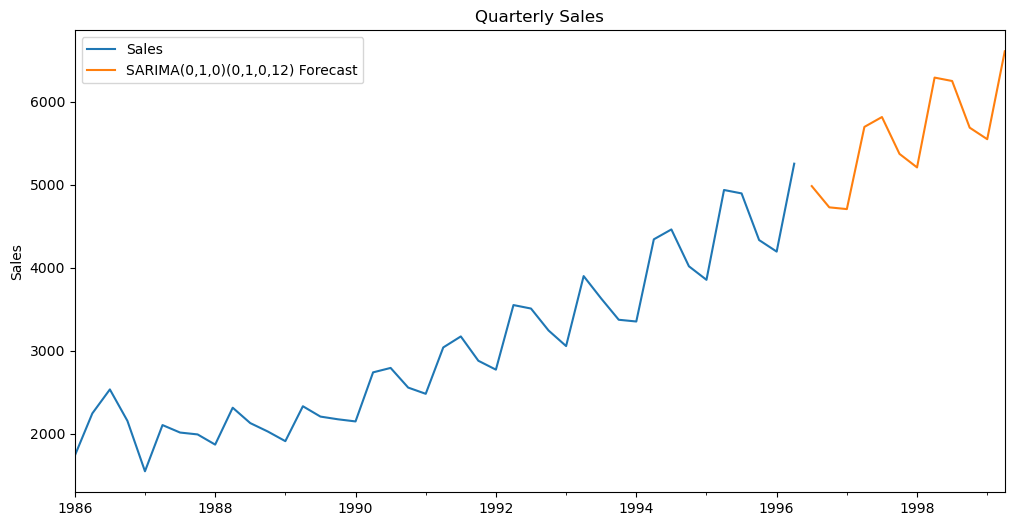

In [57]:
# Plot predictions against known values
title = 'Quarterly Sales'
ylabel='Sales'
xlabel=''

ax = df1['Sales'].plot(legend=True,figsize=(12,6),title=title)
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

- With Auto_Arima we get values for SARIMAX as SARIMAX(0, 1, 0)x(0, 1, 0, 12).

# Forecasting Using Facebook Prophet

In [58]:
from prophet import Prophet

In [59]:
df = pd.read_excel('CocaCola_Sales_Rawdata.xlsx')

In [60]:
df.head()

Quarter        Sales
0   Q1_86  1734.827000
1   Q2_86  2244.960999
2   Q3_86  2533.804993
3   Q4_86  2154.962997
4   Q1_87  1547.818996

The input to Prophet is always a dataframe with two columns: ds and y. The ds (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp. The y column must be numeric, and represents the measurement we wish to forecast.

In [61]:
# Define a function to extract year and quarter, and create the desired date
def extract_datetime(quarter):
   year = int(quarter.split('_')[1])
   quarter = int(quarter.split('_')[0].replace('Q', ''))

   # Map quarters to desired months
   month_map = {1: 1, 2: 4, 3: 7, 4: 10}
   month = month_map[quarter]

   return pd.to_datetime(f"{year}-{month}-01")

# Apply the function to create a new 'Date' column
df['Date'] = df['Quarter'].apply(extract_datetime)

# Drop the original 'Quarter' column if not needed
df = df.drop('Quarter', axis=1)

# df.set_index('Date',inplace=True)

df.head()

Sales       Date
0  1734.827000 1986-01-01
1  2244.960999 1986-04-01
2  2533.804993 1986-07-01
3  2154.962997 1986-10-01
4  1547.818996 1987-01-01

### Format the Data

In [62]:
# df.columns = ['ds','y']

new_names = {'Sales': 'y', 'Date': 'ds'}
df = df.rename(columns=new_names)

df = df[['ds', 'y']]

In [63]:
df.head()

ds            y
0 1986-01-01  1734.827000
1 1986-04-01  2244.960999
2 1986-07-01  2533.804993
3 1986-10-01  2154.962997
4 1987-01-01  1547.818996

In [64]:
df['ds'] = pd.to_datetime(df['ds'])

<Axes: xlabel='ds'>

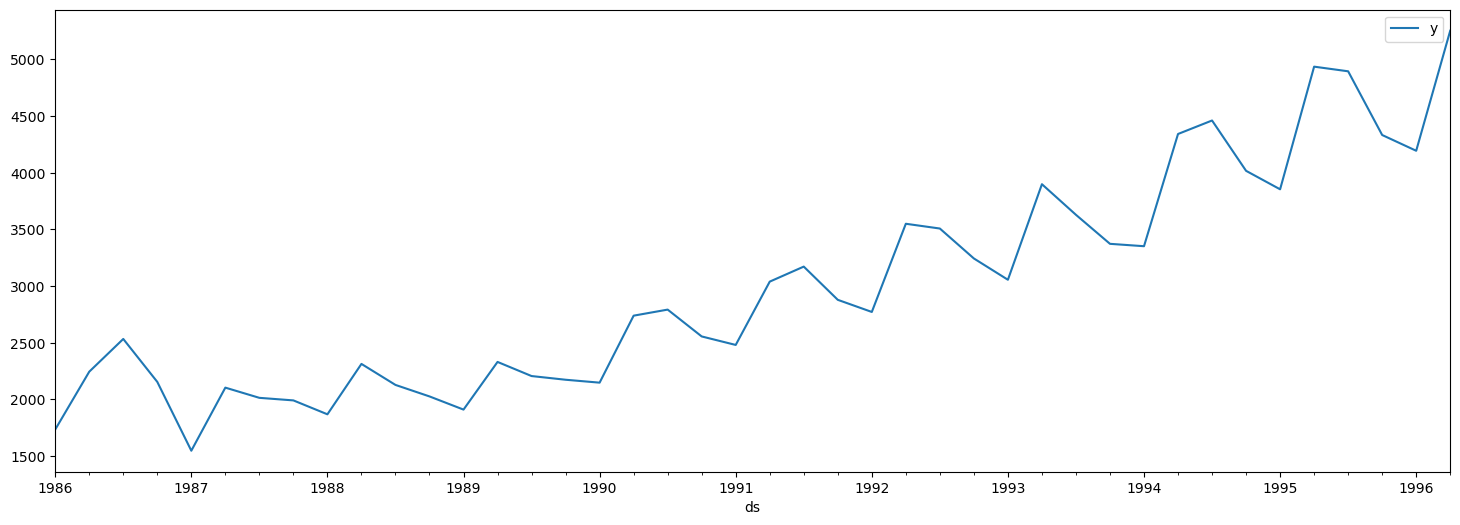

In [65]:
df.plot(x='ds',y='y',figsize=(18,6))

In [66]:
train = df.iloc[:30]
test = df.iloc[30:]

### Create and Fit Model

In [67]:
m = Prophet()
m.fit(train)

00:26:59 - cmdstanpy - INFO - Chain [1] start processing
00:27:00 - cmdstanpy - INFO - Chain [1] done processing


### Create "future" placeholder dataframe

In [68]:
future = m.make_future_dataframe(periods=12,freq = 'Q')

### Predict and fill in the Future

In [69]:
forecast = m.predict(future)

In [70]:
forecast.head()

ds        trend   yhat_lower   yhat_upper  trend_lower  trend_upper  \
0 1986-01-01 -4675.251910  1557.743165  1848.081489 -4675.251910 -4675.251910   
1 1986-04-01 -4666.588980  2095.033013  2368.407381 -4666.588980 -4666.588980   
2 1986-07-01 -4657.829795  2091.084021  2362.029927 -4657.829795 -4657.829795   
3 1986-10-01 -4648.974356  1837.506811  2115.155816 -4648.974356 -4648.974356   
4 1987-01-01 -4640.118917  1591.053647  1856.859807 -4640.118917 -4640.118917   

   additive_terms  additive_terms_lower  additive_terms_upper       yearly  \
0     6370.611191           6370.611191           6370.611191  6370.611191   
1     6900.978835           6900.978835           6900.978835  6900.978835   
2     6881.692376           6881.692376           6881.692376  6881.692376   
3     6623.186477           6623.186477           6623.186477  6623.186477   
4     6369.053768           6369.053768           6369.053768  6369.053768   

   yearly_lower  yearly_upper  multiplicative_terms  \
0   6370.611191   6370.611191                   0.0   
1   6900.978835   6900.978835                   0.0   
2   6881.692376   6881.692376                   0.0   
3   6623.186477   6623.186477                   0.0   
4   6369.053768   6369.053768                   0.0   

   multiplicative_terms_lower  multiplicative_terms_upper         yhat  
0                         0.0                         0.0  1695.359281  
1                         0.0                         0.0  2234.389854  
2                         0.0                         0.0  2223.862580  
3                         0.0                         0.0  1974.212121  
4                         0.0                         0.0  1728.934851

In [71]:
forecast.tail(12)

ds        trend   yhat_lower   yhat_upper  trend_lower  \
30 1993-06-30 -3051.708809  3516.366385  3795.498645 -3053.994376   
31 1993-09-30 -2962.749934  3415.413302  3695.071825 -2969.744519   
32 1993-12-31 -2873.791060  3449.615938  3725.015274 -2887.582926   
33 1994-03-31 -2786.766074  3568.975152  3851.316633 -2808.564604   
34 1994-06-30 -2698.774143  3721.061272  4009.723834 -2728.510326   
35 1994-09-30 -2609.815269  3681.860682  3978.109443 -2648.547396   
36 1994-12-31 -2520.856394  3862.699391  4155.345584 -2569.815842   
37 1995-03-31 -2433.831408  3768.369706  4076.340803 -2494.604724   
38 1995-06-30 -2345.839478  3893.656790  4214.269357 -2417.888513   
39 1995-09-30 -2256.880603  3910.443838  4257.424616 -2341.693658   
40 1995-12-31 -2167.921729  4249.619389  4620.930043 -2271.627170   
41 1996-03-31 -2079.929799  4482.595467  4853.187974 -2198.263184   

    trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
30 -3049.048403     6702.810578           6702.810578           6702.810578   
31 -2954.368404     6515.830131           6515.830131           6515.830131   
32 -2857.686771     6461.802209           6461.802209           6461.802209   
33 -2760.174621     6491.056664           6491.056664           6491.056664   
34 -2661.856132     6564.270768           6564.270768           6564.270768   
35 -2558.912262     6433.248802           6433.248802           6433.248802   
36 -2456.123328     6524.864743           6524.864743           6524.864743   
37 -2355.397854     6342.382986           6342.382986           6342.382986   
38 -2252.243819     6386.455276           6386.455276           6386.455276   
39 -2148.876164     6326.951634           6326.951634           6326.951634   
40 -2045.154374     6603.768796           6603.768796           6603.768796   
41 -1939.699602     6734.099476           6734.099476           6734.099476   

         yearly  yearly_lower  yearly_upper  multiplicative_terms  \
30  6702.810578   6702.810578   6702.810578                   0.0   
31  6515.830131   6515.830131   6515.830131                   0.0   
32  6461.802209   6461.802209   6461.802209                   0.0   
33  6491.056664   6491.056664   6491.056664                   0.0   
34  6564.270768   6564.270768   6564.270768                   0.0   
35  6433.248802   6433.248802   6433.248802                   0.0   
36  6524.864743   6524.864743   6524.864743                   0.0   
37  6342.382986   6342.382986   6342.382986                   0.0   
38  6386.455276   6386.455276   6386.455276                   0.0   
39  6326.951634   6326.951634   6326.951634                   0.0   
40  6603.768796   6603.768796   6603.768796                   0.0   
41  6734.099476   6734.099476   6734.099476                   0.0   

    multiplicative_terms_lower  multiplicative_terms_upper         yhat  
30                         0.0                         0.0  3651.101769  
31                         0.0                         0.0  3553.080197  
32                         0.0                         0.0  3588.011150  
33                         0.0                         0.0  3704.290590  
34                         0.0                         0.0  3865.496624  
35                         0.0                         0.0  3823.433533  
36                         0.0                         0.0  4004.008349  
37                         0.0                         0.0  3908.551578  
38                         0.0                         0.0  4040.615798  
39                         0.0                         0.0  4070.071030  
40                         0.0                         0.0  4435.847067  
41                         0.0                         0.0  4654.169678

In [72]:
test.tail()

ds       y
37 1995-04-01  4936.0
38 1995-07-01  4895.0
39 1995-10-01  4333.0
40 1996-01-01  4194.0
41 1996-04-01  5253.0

<Axes: xlabel='ds'>

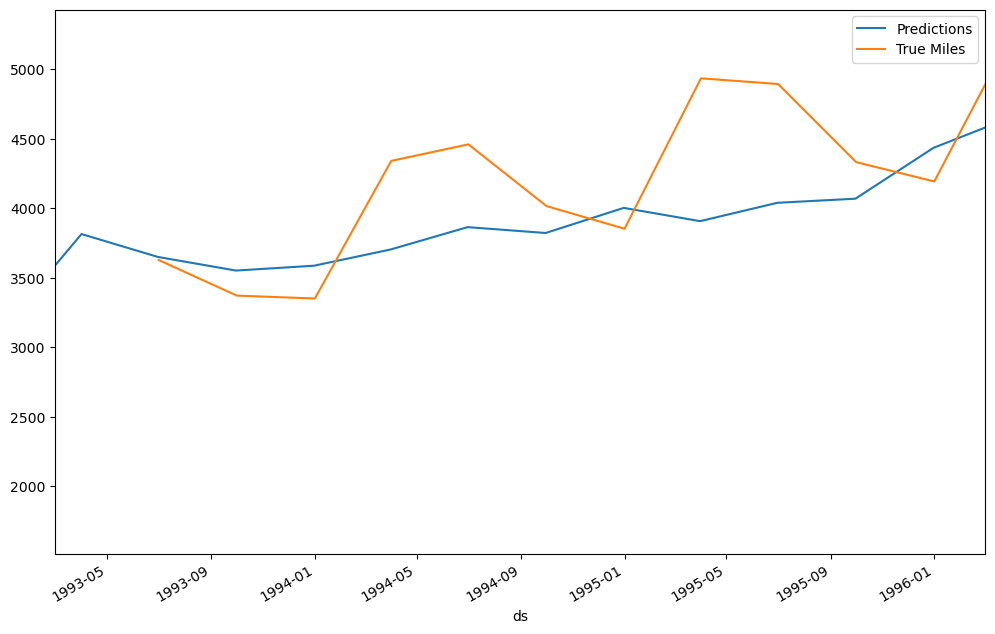

In [73]:
ax = forecast.plot(x='ds',y='yhat',label='Predictions',legend=True,figsize=(12,8))

test.plot(x='ds',y='y',label='True Miles',legend=True,ax=ax,xlim=('1993-03-01','1996-03-01'))
# test.plot(x='ds',y='y',label='True Miles',legend=True,ax=ax)

In [74]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [75]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)

ds         yhat   yhat_lower   yhat_upper
30 1993-06-30  3651.101769  3516.366385  3795.498645
31 1993-09-30  3553.080197  3415.413302  3695.071825
32 1993-12-31  3588.011150  3449.615938  3725.015274
33 1994-03-31  3704.290590  3568.975152  3851.316633
34 1994-06-30  3865.496624  3721.061272  4009.723834
35 1994-09-30  3823.433533  3681.860682  3978.109443
36 1994-12-31  4004.008349  3862.699391  4155.345584
37 1995-03-31  3908.551578  3768.369706  4076.340803
38 1995-06-30  4040.615798  3893.656790  4214.269357
39 1995-09-30  4070.071030  3910.443838  4257.424616
40 1995-12-31  4435.847067  4249.619389  4620.930043
41 1996-03-31  4654.169678  4482.595467  4853.187974

### Plotting Forecast

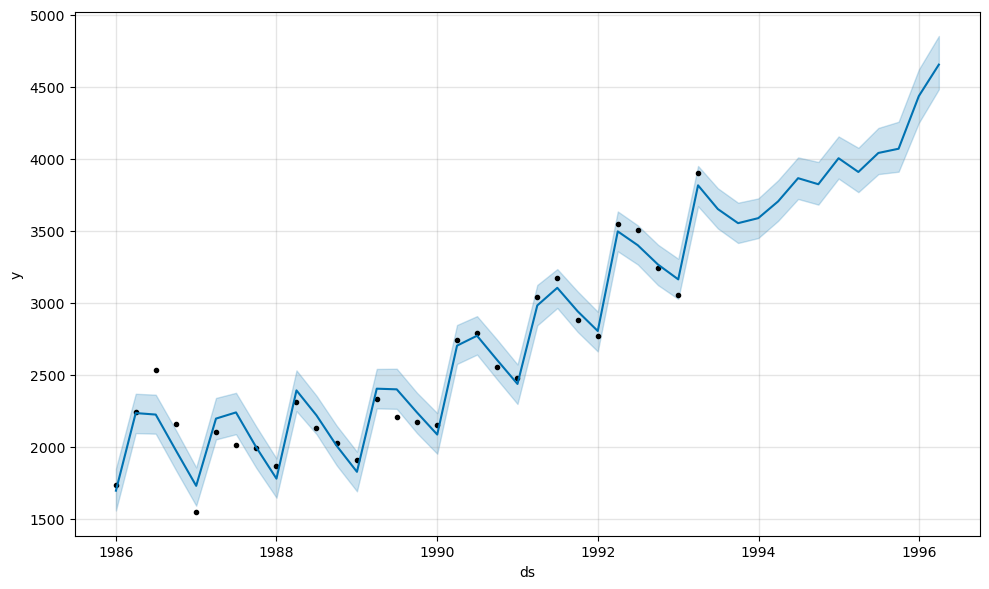

In [76]:
m.plot(forecast);

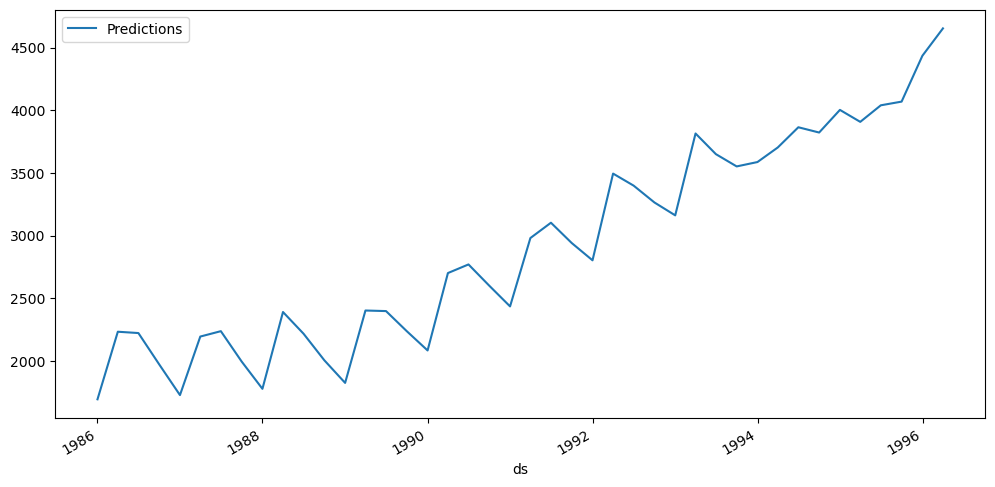

In [77]:
ax = forecast.plot(x='ds', y='yhat', label = 'Predictions', figsize=(12,6))

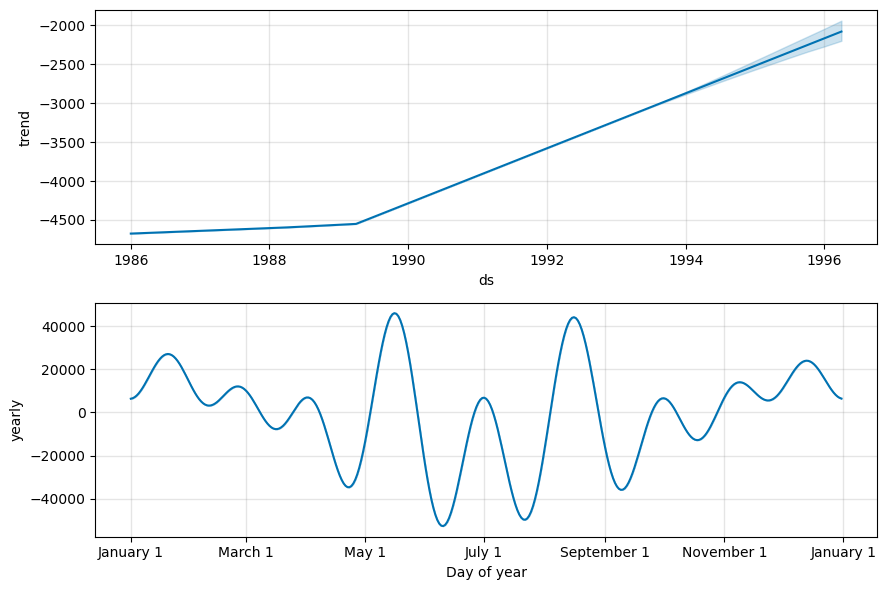

In [78]:
m.plot_components(forecast);

### Model Evaluation

In [79]:
from statsmodels.tools.eval_measures import rmse

In [80]:
predictions = forecast.iloc[-12:]['yhat']

In [81]:
predictions

30    3651.101769
31    3553.080197
32    3588.011150
33    3704.290590
34    3865.496624
35    3823.433533
36    4004.008349
37    3908.551578
38    4040.615798
39    4070.071030
40    4435.847067
41    4654.169678
Name: yhat, dtype: float64

In [82]:
test['y']

30    3629.0
31    3373.0
32    3352.0
33    4342.0
34    4461.0
35    4017.0
36    3854.0
37    4936.0
38    4895.0
39    4333.0
40    4194.0
41    5253.0
Name: y, dtype: float64

In [83]:
rmse(predictions,test['y'])

514.9214097556253

In [84]:
test.mean()

ds    1994-11-15 14:00:00
y             4219.916667
dtype: object

### Prophet Diagnostics

In [85]:
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_cross_validation_metric

In [86]:
#INITIAL
initial = 5 * 365
initial = str(initial) + ' days'

In [87]:
initial

'1825 days'

In [88]:
#PERIOD
period = 5 * 365
period = str(period) + ' days'

In [89]:
period

'1825 days'

In [90]:
#HORIZON 
horizon = 365
horizon = str(horizon) + ' days'

In [91]:
horizon

'365 days'

In [92]:
df_cv = cross_validation(m, initial=initial, period=period, horizon=horizon)

  0%|          | 0/1 [00:00<?, ?it/s]

00:27:04 - cmdstanpy - INFO - Chain [1] start processing
00:27:04 - cmdstanpy - INFO - Chain [1] done processing


In [93]:
df_cv.head()

ds         yhat   yhat_lower   yhat_upper            y     cutoff
0 1992-07-01  3294.443917  3153.332782  3438.457662  3508.000000 1992-04-01
1 1992-10-01  3255.718872  3117.368959  3400.609363  3243.859993 1992-04-01
2 1993-01-01  3199.999440  3058.089543  3341.917681  3056.000000 1992-04-01
3 1993-04-01  3768.650749  3631.663308  3906.474922  3899.000000 1992-04-01

In [94]:
df_cv.tail()

ds         yhat   yhat_lower   yhat_upper            y     cutoff
0 1992-07-01  3294.443917  3153.332782  3438.457662  3508.000000 1992-04-01
1 1992-10-01  3255.718872  3117.368959  3400.609363  3243.859993 1992-04-01
2 1993-01-01  3199.999440  3058.089543  3341.917681  3056.000000 1992-04-01
3 1993-04-01  3768.650749  3631.663308  3906.474922  3899.000000 1992-04-01

In [95]:
performance_metrics(df_cv)

horizon           mse        rmse         mae      mape     mdape  \
0  91 days  45606.200496  213.556083  213.556083  0.060877  0.060877   
1 183 days    140.633010   11.858879   11.858879  0.003656  0.003656   
2 275 days  20735.838755  143.999440  143.999440  0.047120  0.047120   
3 365 days  16990.927189  130.349251  130.349251  0.033431  0.033431   

      smape  coverage  
0  0.062788       0.0  
1  0.003649       1.0  
2  0.046036       0.0  
3  0.034000       1.0

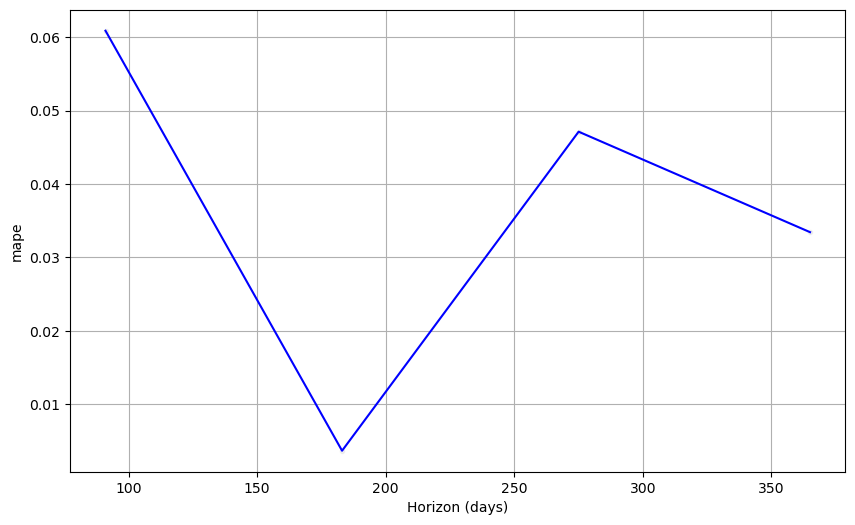

In [96]:
plot_cross_validation_metric(df_cv, metric='mape');

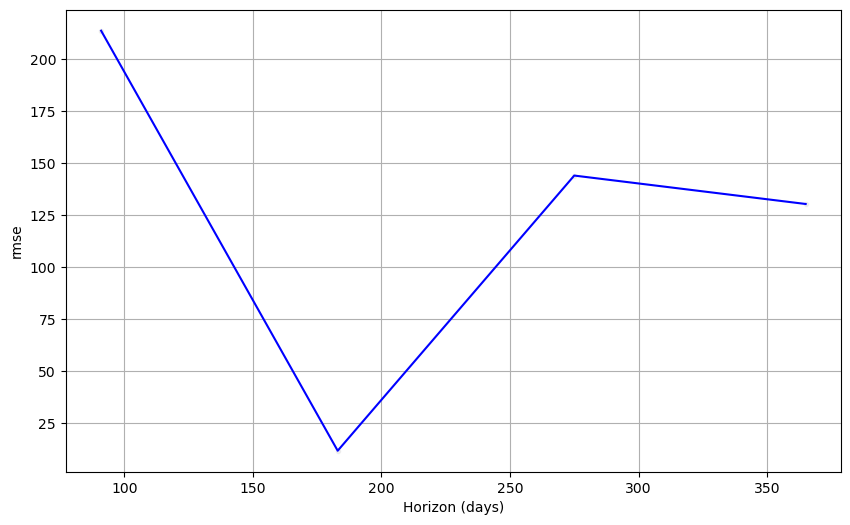

In [97]:
plot_cross_validation_metric(df_cv, metric='rmse');